In [ ]:
#  Gọi các thư viên cần thiết
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.datasets import cifar10
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers import RMSprop
from keras.callbacks import EarlyStopping
from keras.utils import np_utils
from keras.backend import dropout
from keras.models import Sequential
from keras.layers import Dense, Dropout


In [ ]:
# Chia dữ liệu thành 2 phần:  phần huyến luyện và phần test
(x_train, y_train),(x_test,y_test) = cifar10.load_data()

170508288/170498071 [==============================] - 5s 0us/step


<function matplotlib.pyplot.show>

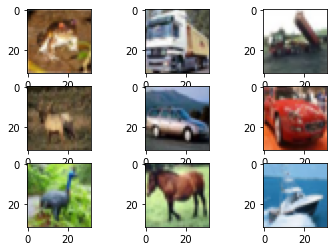

In [ ]:
for i in range(9):
  plt.subplot(330+i+1)
  plt.imshow(x_train[i])
plt.show

In [ ]:
# Kích thước các tập dữ liệu
x_train.shape , x_test .shape,  y_train.shape,  y_test.shape

((50000, 32, 32, 3), (10000, 32, 32, 3), (50000, 1), (10000, 1))

In [ ]:
x_train.shape

(50000, 32, 32, 3)

In [ ]:
y_train.shape

(50000, 1)

In [ ]:
x_test .shape

(10000, 32, 32, 3)

In [ ]:
y_test.shape

(10000, 1)

In [ ]:
#  x_train , x_test  là mảng 4 chiều nên chuyển sang mảng 2 chiều 
x_train = x_train.reshape(50000 , 3072 )  #32*32*3
x_test = x_test.reshape(10000 ,  3072 )   #32*32*3

# Chuẩn hóa dữ liệu
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /=255
x_test /= 255

# Chuyển y thành 10 class do output là 10
y_train =np_utils.to_categorical(y_train,10)
y_test = np_utils.to_categorical(y_test,10)

In [ ]:
y_train.shape

(50000, 10)

In [ ]:
# Tạo mạng neron nhân tạo

model = Sequential()
model.add(Dense(512,activation='relu',input_shape=(3072,)))
model.add(Dropout(0.2))
model.add(Dense(256,activation='relu'))  
model.add(Dropout(0.2))
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10,activation='softmax'))
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               1573376   
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_2 (Dense)             (None, 512)               131584    
                                                                 
 dropout_2 (Dropout)         (None, 512)               0         
                                                                 
 dense_3 (Dense)             (None, 10)                5

In [ ]:
# Huấn luyện mô hình 
model.compile(loss='categorical_crossentropy',optimizer=RMSprop(), metrics=['accuracy'])
history = model.fit(x_train,y_train, batch_size=128, epochs=500 , verbose=1 , validation_split=0.2 , callbacks=[EarlyStopping(monitor='val_loss',patience=70)])


Epoch 1/500
313/313 [==============================] - 6s 6ms/step - loss: 2.1268 - accuracy: 0.2330 - val_loss: 1.9275 - val_accuracy: 0.2970
Epoch 2/500
313/313 [==============================] - 2s 6ms/step - loss: 1.8986 - accuracy: 0.3117 - val_loss: 1.7944 - val_accuracy: 0.3547
Epoch 3/500
313/313 [==============================] - 2s 5ms/step - loss: 1.8251 - accuracy: 0.3440 - val_loss: 1.7493 - val_accuracy: 0.3655
Epoch 4/500
313/313 [==============================] - 2s 5ms/step - loss: 1.7703 - accuracy: 0.3648 - val_loss: 1.8190 - val_accuracy: 0.3522
Epoch 5/500
313/313 [==============================] - 2s 5ms/step - loss: 1.7321 - accuracy: 0.3770 - val_loss: 1.7879 - val_accuracy: 0.3557
Epoch 6/500
313/313 [==============================] - 2s 5ms/step - loss: 1.7066 - accuracy: 0.3916 - val_loss: 1.6813 - val_accuracy: 0.4026
Epoch 7/500
313/313 [==============================] - 2s 5ms/step - loss: 1.6809 - accuracy: 0.4014 - val_loss: 1.6365 - val_accuracy: 0.4299

In [ ]:
# Lưu kết quả của model
from tensorflow.keras.models import load_model
model.save('huyCifar10.h5')
load_model('huyCifar10.h5')

In [ ]:
# Đánh giá độ chính xác của mô hình
score = model.evaluate(x_test,y_test,verbose=0)
print('Sai số kiểm tra là: ',score[0])
print('Độ chính xác kiểm tra là: ',score[1])

Sai số kiểm tra là:  1.5730534791946411
Độ chính xác kiểm tra là:  0.4507000148296356


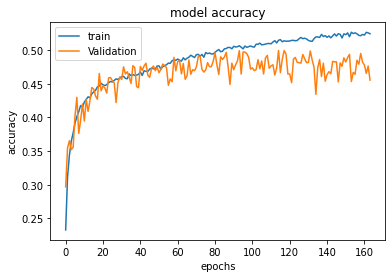

In [ ]:
# Vẽ lại quá trình học
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend(['train','Validation'])
plt.show()

In [ ]:
# Kiểm tra kết quả của mô hình
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input
from tensorflow.keras.utils import load_img, img_to_array
filename = 'Nai.png'
img = load_img(filename, target_size =(32,32))
img.show(filename)
img = img_to_array(img)
img = img.astype('float32')
img = img/255
img=img.reshape(1,32*32*3)
np.argmax (model.predict(img) , axis =-1)

array([6])